In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import sklearn
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df= pd.read_csv('/content/Sparkling.csv', parse_dates=['YearMonth'], index_col='YearMonth')
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [ ]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [ ]:
df.shape


(187, 1)

In [ ]:
print('The number of rows:', df.shape[0], '\n''The number of columns:', df.shape[1])

The number of rows: 187 
The number of columns: 1


In [ ]:
print("toal number of the year in the data:", 187/12)

toal number of the year in the data: 15.583333333333334


In [ ]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [ ]:
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [ ]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']= 12, 8

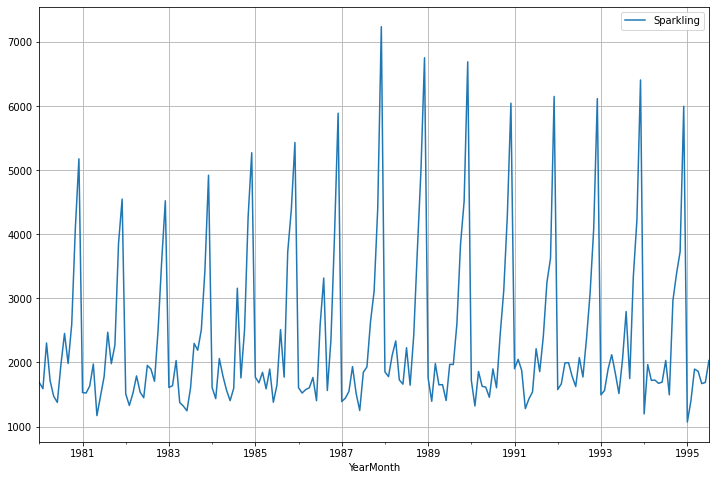

In [ ]:
df.plot(grid= True)
plt.show()

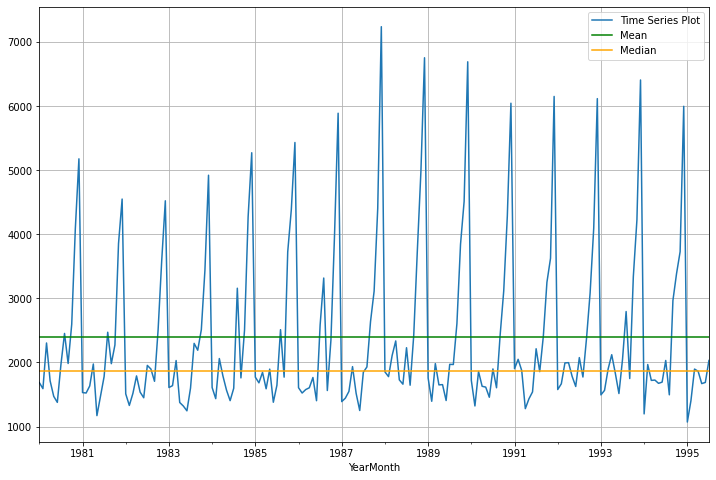

In [ ]:

df.plot();
plt.axhline(df['Sparkling'].mean(), color= 'Green');
plt.axhline(df['Sparkling'].median(), color='Orange')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

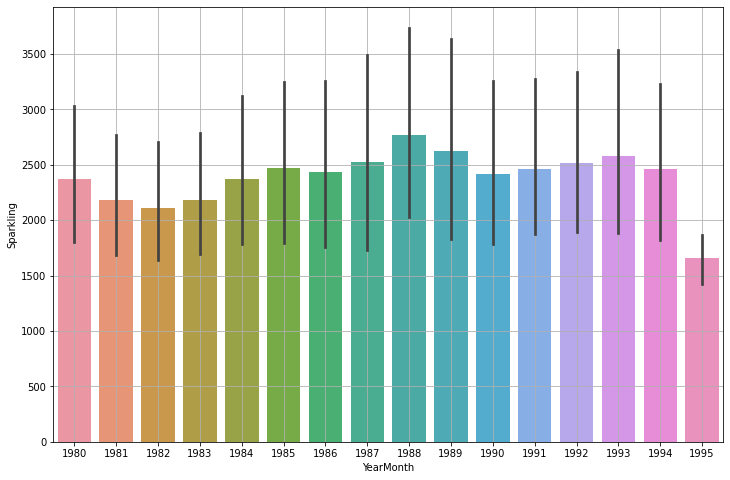

In [ ]:

sns.barplot(df.index.year,df.Sparkling,data=df)
plt.grid();

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

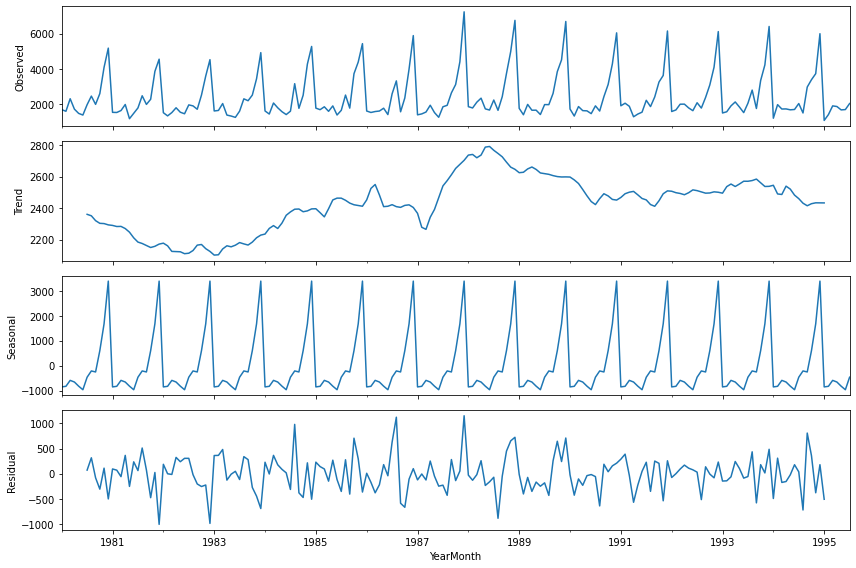

In [ ]:
Additive_decomposition= seasonal_decompose(df, model= 'additive')
Additive_decomposition.plot();

In [ ]:



trend= Additive_decomposition.trend
Seasonality= Additive_decomposition.seasonal
residual= Additive_decomposition.resid
print('trend','\n', trend.head(12), '\n'); print('Seasonality', '\n', Seasonality.head(12), '\n'); print('residual','\n', residual.head(12),'\n');




trend 
               Sparkling
YearMonth              
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01  2360.666667
1980-08-01  2351.333333
1980-09-01  2320.541667
1980-10-01  2303.583333
1980-11-01  2302.041667
1980-12-01  2293.791667 

Seasonality 
               Sparkling
YearMonth              
1980-01-01  -854.260599
1980-02-01  -830.350678
1980-03-01  -592.356630
1980-04-01  -658.490559
1980-05-01  -824.416154
1980-06-01  -967.434011
1980-07-01  -465.502265
1980-08-01  -214.332821
1980-09-01  -254.677265
1980-10-01   599.769957
1980-11-01  1675.067179
1980-12-01  3386.983846 

residual 
              Sparkling
YearMonth             
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01   70.835599
1980-08-01  315.999487
1980-09-01  -81.864401
1980-10-01 -307.353290
1980-11-01  109

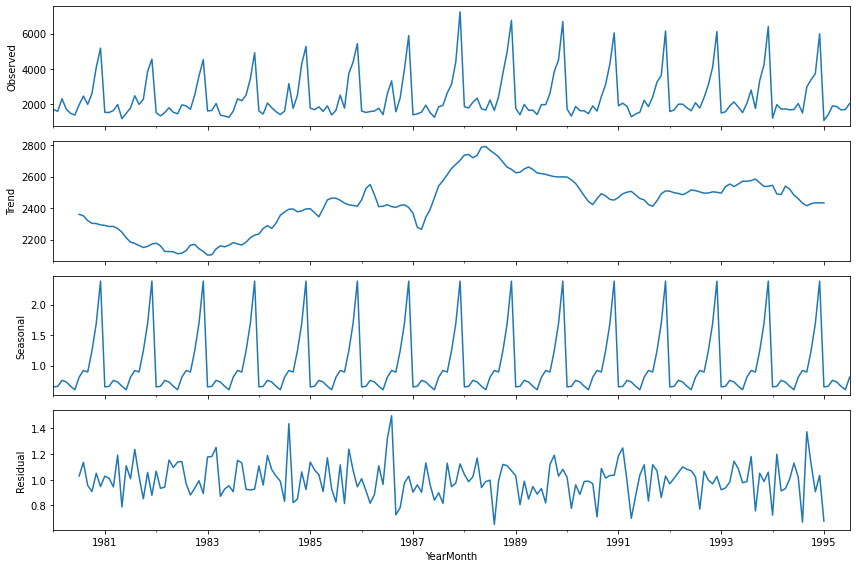

In [ ]:



multiplicative_decomposition= seasonal_decompose(df, model='multiplicative')
multiplicative_decomposition.plot();

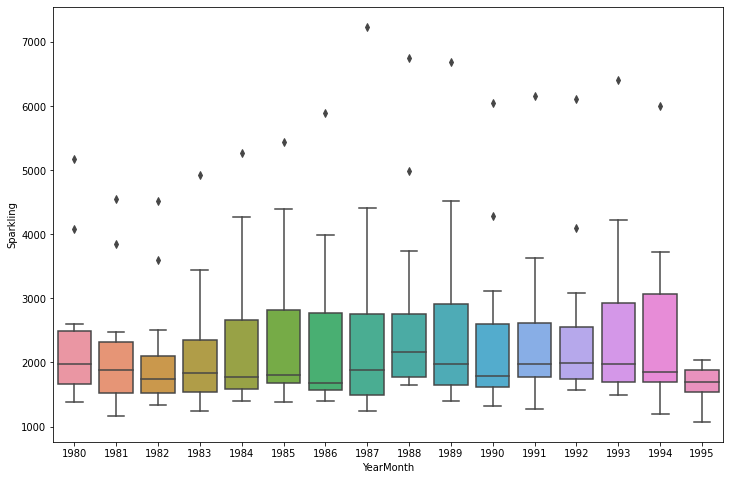

In [ ]:
sns.boxplot(x= df.index.year, y=df['Sparkling']);


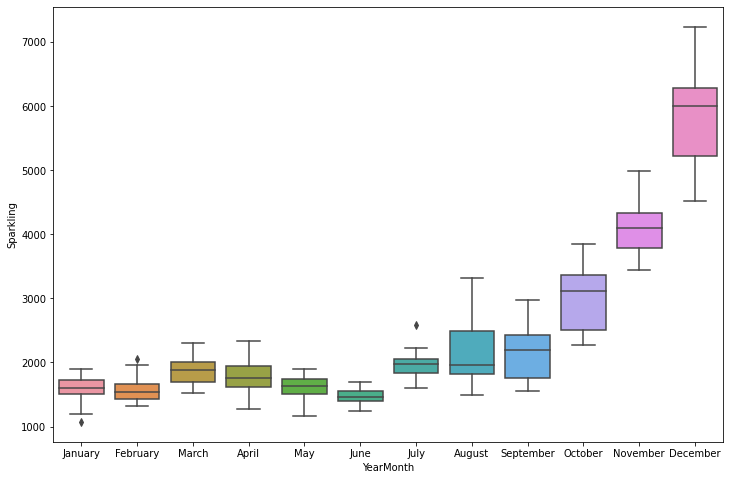

In [ ]:
sns.boxplot(x= df.index.month_name(), y= df['Sparkling'])

In [ ]:
years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


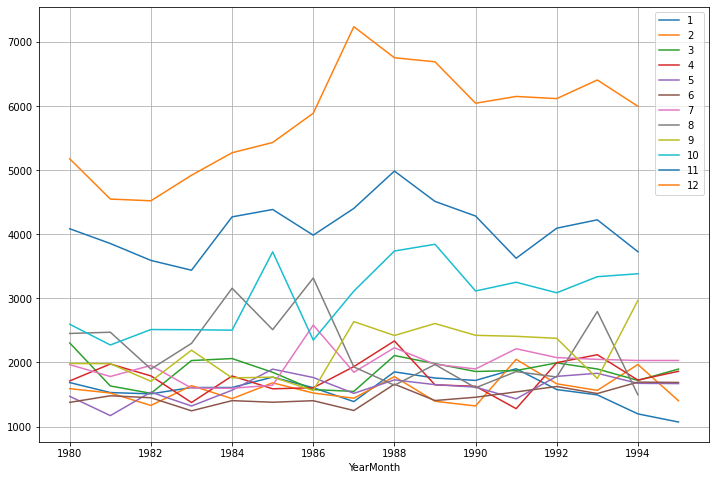

In [ ]:
years.plot()
plt.grid()
plt.legend(loc='best');

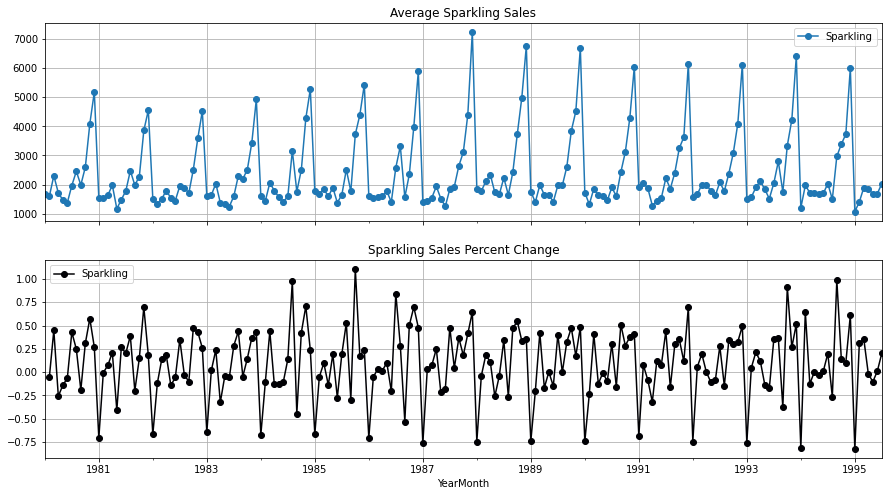

In [ ]:
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="inferno",title="Sparkling Sales Percent Change",grid=True)

Train- Test Split

In [ ]:
train= df[df.index<='1991']
test= df[df.index>'1991']

In [ ]:
print('Train','\n', train.shape, '\n'); print('Test', '\n', test.shape, '\n');

Train 
 (133, 1) 

Test 
 (54, 1) 



In [ ]:
print('Train', '\n', train.head(4), '\n'); print('Test', '\n', test.head(4), '\n');

Train 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712 

Test 
             Sparkling
YearMonth            
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 



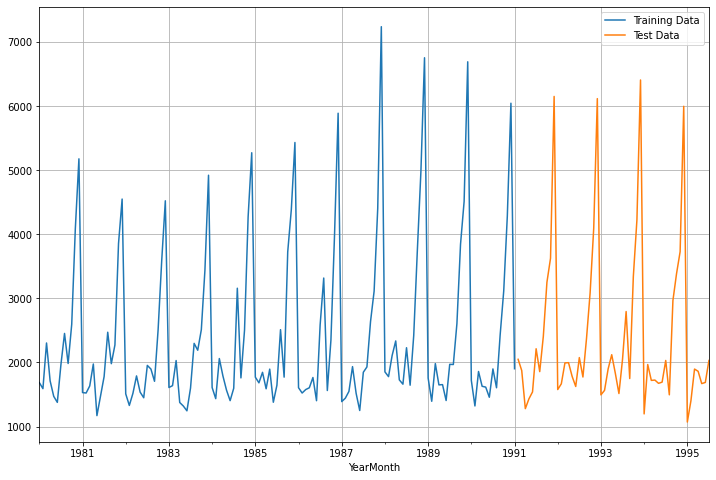

In [ ]:
train['Sparkling'].plot()
test['Sparkling'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time, '\n');
print('Test Time instance','\n',test_time, '\n');

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186] 



Linear Regression

In [ ]:
LinearRegression_train= train.copy()
LinearRegression_test= test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132
1991-01-01       1902   133 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-02-01       2049   133
1991-03-01       1874   134
1991-04-01       1279   135
1991-05-01       1432   136
1991-06-01       1540   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   182
1995-04-01       1862   183
1995-05-01       1670   184
1995-06-01       1688   185
1995-07-01       2031   186 



In [ ]:

from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Sparkling'].values)

LinearRegression()

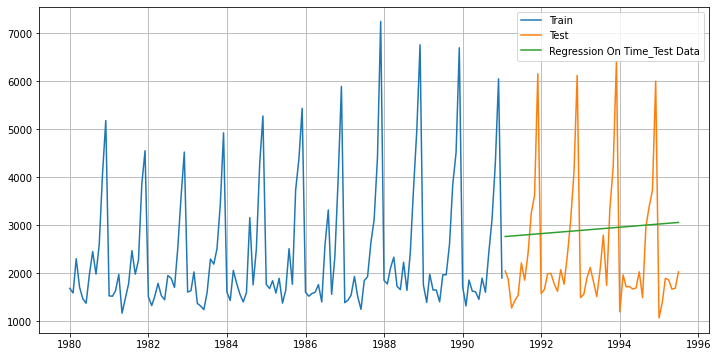

In [ ]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(12,6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [ ]:
from sklearn import metrics

In [ ]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1381.321


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796


Naive Approach

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-02-01    1902
1991-03-01    1902
1991-04-01    1902
1991-05-01    1902
1991-06-01    1902
Name: naive, dtype: int64

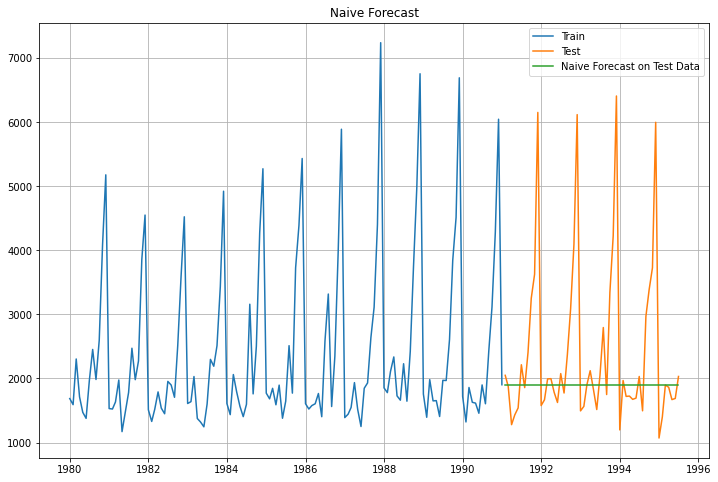

In [ ]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1381.177


In [ ]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135


Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()


,Sparkling,mean_forecast
YearMonth,,
1991-02-01,2049,2400.007519
1991-03-01,1874,2400.007519
1991-04-01,1279,2400.007519
1991-05-01,1432,2400.007519
1991-06-01,1540,2400.007519


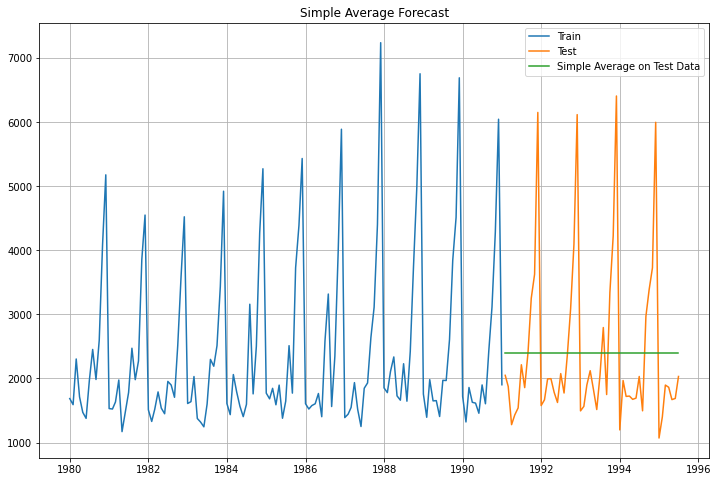

In [ ]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1285.040


In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135
SimpleAverageModel,1285.039964


Moving Average

In [ ]:
MovingAverage= df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [ ]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


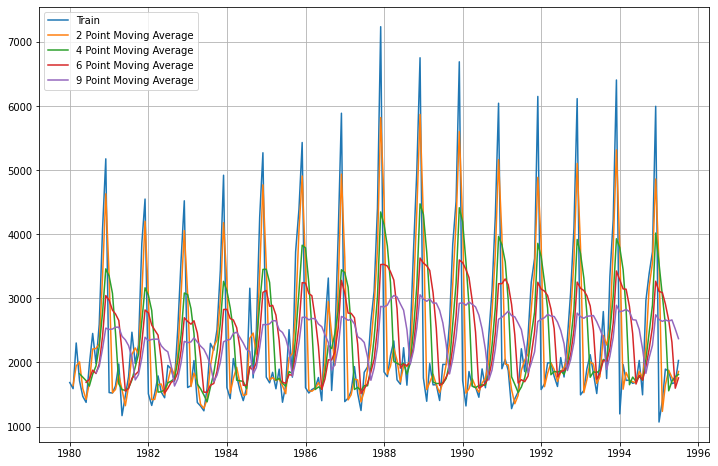

In [ ]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<='1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>'1991']

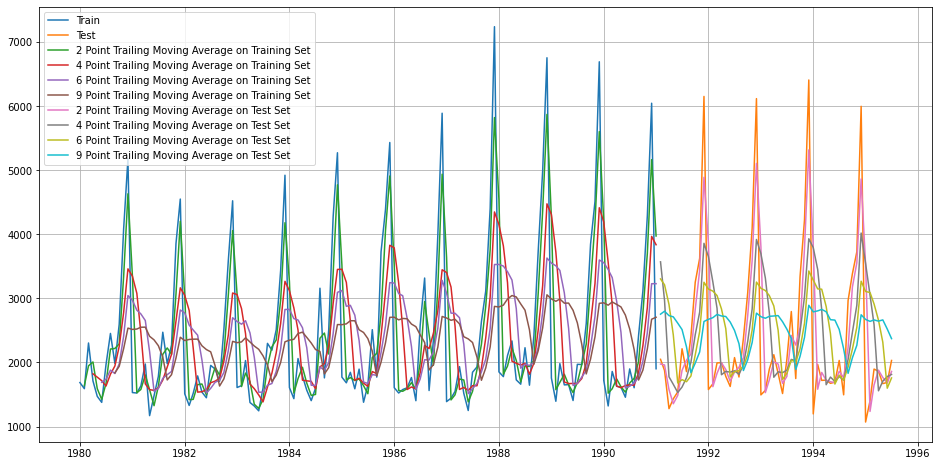

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

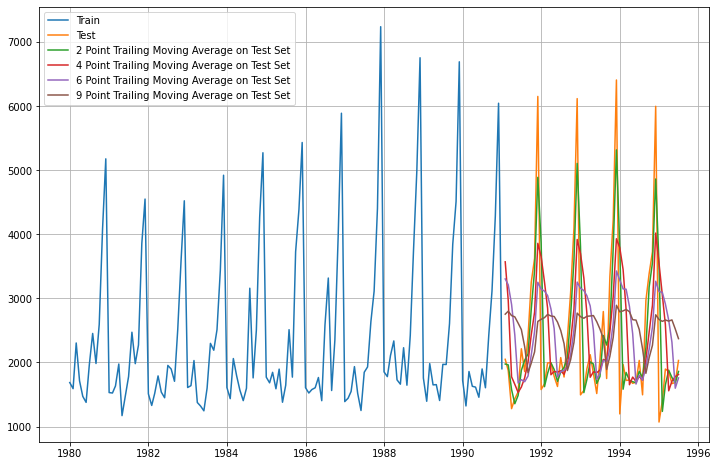

In [ ]:
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [ ]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_2))


For 2 point Moving Average Model forecast on the Training Data, RMSE is 770.929


In [ ]:
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))


rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))


rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1137.137
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.097
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1354.278


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993
9pointTrailingMovingAverage,1354.277938


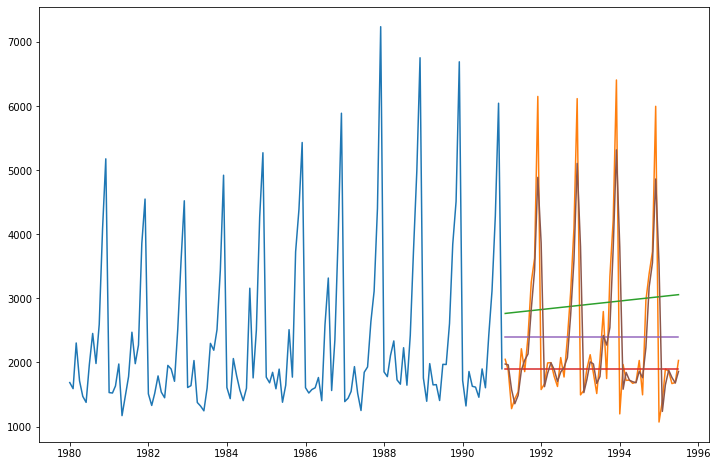

In [ ]:

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

Simple Exponential Model

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [ ]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 2352.4614431311265,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.010531155821789815,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [ ]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2.head(5)

1991-02-01    2452.509281
1991-03-01    2452.509281
1991-04-01    2452.509281
1991-05-01    2452.509281
1991-06-01    2452.509281
Freq: MS, dtype: float64

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1285.771


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.01:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993
9pointTrailingMovingAverage,1354.277938
Alpha=0.01:SimpleExponentialSmoothing,1285.771348


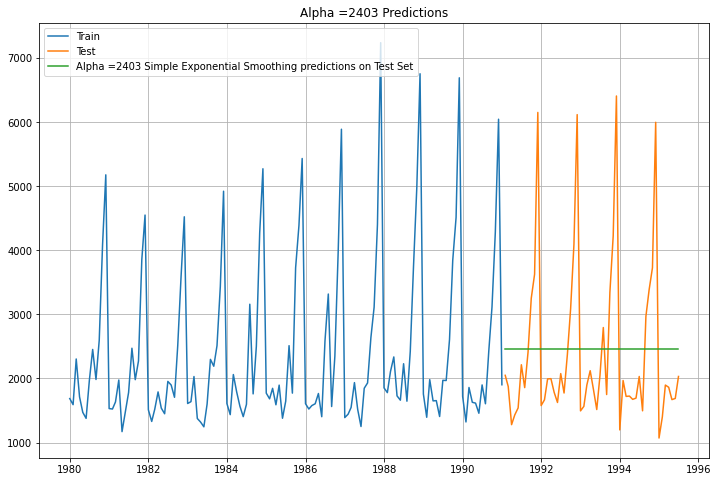

In [ ]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model2, label='Alpha =2403 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =2403 Predictions');

In [ ]:
# Double exponential smoothing

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(SES_train['Sparkling'])

In [ ]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [ ]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.531261,True
smoothing_slope,beta,0.000000,True
initial_level,l.0,1686.110962,True
initial_slope,b.0,12.059207,True


In [ ]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3.head(5)

1991-02-01    3309.794769
1991-03-01    3321.853976
1991-04-01    3333.913183
1991-05-01    3345.972390
1991-06-01    3358.031596
Freq: MS, dtype: float64

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1780.014


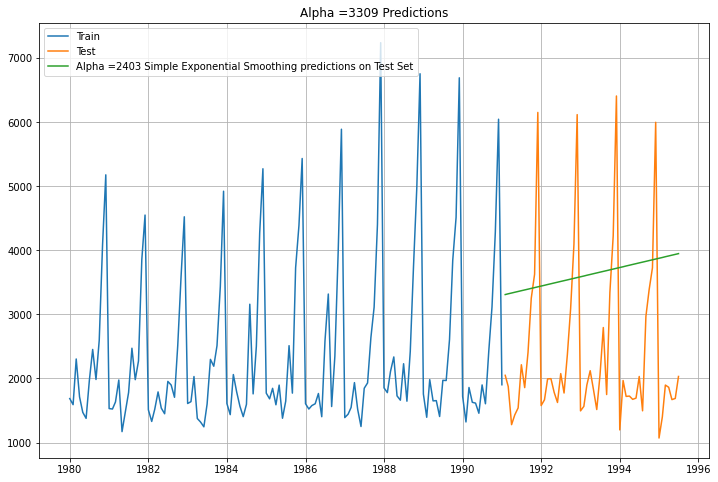

In [ ]:
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model3, label='Alpha =2403 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =3309 Predictions');

In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.53,Beta=0:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993
9pointTrailingMovingAverage,1354.277938
Alpha=0.01:SimpleExponentialSmoothing,1285.771348
"Alpha=0.53,Beta=0:DoubleExponentialSmoothing",1780.013842


In [ ]:
#Triple Exponenential smoothing

In [ ]:

TES_train = train.copy()
TES_test = test.copy()



In [ ]:
model_TES = ExponentialSmoothing(SES_train['Sparkling'],trend='additive',seasonal='multiplicative')
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [ ]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 1661.832434886907,
 'initial_seasons': array([0.99435425, 0.95476816, 1.22075803, 1.11459138, 0.92533683,
        0.92314832, 1.20384902, 1.51805025, 1.25189661, 1.60534748,
        2.43997756, 3.06553595]),
 'initial_slope': 5.013018075759529,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.14709624389386072,
 'smoothing_seasonal': 0.36884427465038105,
 'smoothing_slope': 2.1192370620315578e-30,
 'use_boxcox': False}

In [ ]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4.head(2)

1991-02-01    1416.641366
1991-03-01    1860.822914
Freq: MS, dtype: float64

In [ ]:
rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 427.963


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.14,Beta=2.1133171248060435e-30,Gamma=0.368:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993
9pointTrailingMovingAverage,1354.277938
Alpha=0.01:SimpleExponentialSmoothing,1285.771348
"Alpha=0.53,Beta=0:DoubleExponentialSmoothing",1780.013842
"Alpha=0.14,Beta=2.1133171248060435e-30,Gamma=0.368:TripleExponentialSmoothing",427.962735


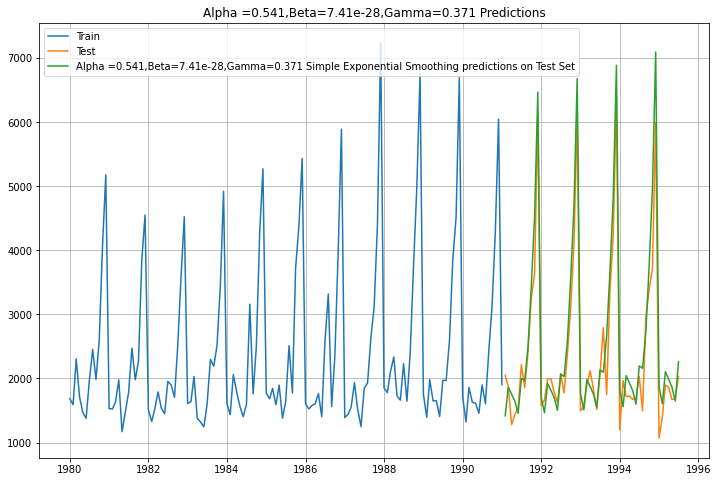

In [ ]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model4, label='Alpha =0.541,Beta=7.41e-28,Gamma=0.371 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.541,Beta=7.41e-28,Gamma=0.371 Predictions');

In [ ]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [ ]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [ ]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.3,1546.771715
1,0.4,1597.479409
2,0.5,1576.378119
3,0.6,1497.808823
4,0.7,1393.710437
5,0.8,1307.507815
6,0.9,1289.773065


In [ ]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
6,0.9,1289.773065
5,0.8,1307.507815
4,0.7,1393.710437
3,0.6,1497.808823
0,0.3,1546.771715
2,0.5,1576.378119
1,0.4,1597.479409


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993
9pointTrailingMovingAverage,1354.277938
Alpha=0.01:SimpleExponentialSmoothing,1285.771348
"Alpha=0.53,Beta=0:DoubleExponentialSmoothing",1780.013842
"Alpha=0.14,Beta=2.1133171248060435e-30,Gamma=0.368:TripleExponentialSmoothing",427.962735


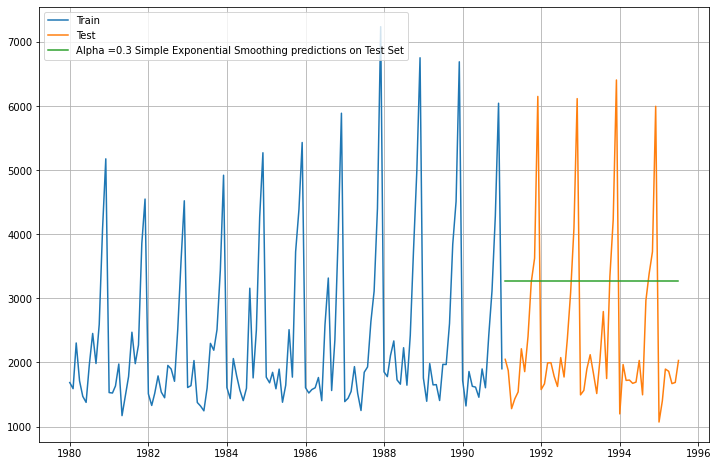

In [ ]:
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')



plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Sparkling'])

In [ ]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [ ]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.3,0.3,10766.012054
1,0.3,0.4,14885.616392
2,0.3,0.5,18374.789920
3,0.3,0.6,20047.271798
4,0.3,0.7,18731.284288
...,...,...,...
59,1.0,0.6,60961.370556
60,1.0,0.7,77608.419050
61,1.0,0.8,95017.525115
62,1.0,0.9,113014.872137


In [ ]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
25,0.6,0.4,1656.603279
7,0.3,1.0,1941.109078
32,0.7,0.3,2555.785330
18,0.5,0.5,2712.713289
12,0.4,0.7,2861.842977
...,...,...,...
54,0.9,0.9,94251.935447
61,1.0,0.8,95017.525115
55,0.9,1.0,110507.022046
62,1.0,0.9,113014.872137


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.6 & Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993
9pointTrailingMovingAverage,1354.277938
Alpha=0.01:SimpleExponentialSmoothing,1285.771348
"Alpha=0.53,Beta=0:DoubleExponentialSmoothing",1780.013842
"Alpha=0.14,Beta=2.1133171248060435e-30,Gamma=0.368:TripleExponentialSmoothing",427.962735


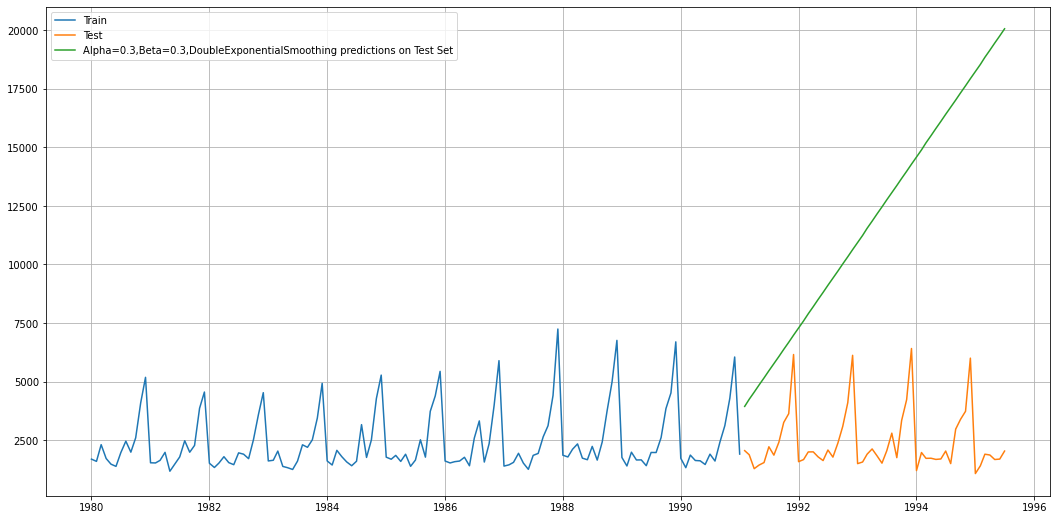

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict',0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();


In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [ ]:
for i in np.arange(0.3,1,0.1):
    for j in np.arange(0.3,1,0.1):
        for k in np.arange(0.3,1.,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [ ]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.3,0.3,0.3,2.568529e+03
1,0.3,0.3,0.4,1.968028e+03
2,0.3,0.3,0.5,1.429486e+03
3,0.3,0.3,0.6,7.944248e+02
4,0.3,0.3,0.7,8.074453e+02
...,...,...,...,...
338,0.9,0.9,0.5,6.422373e+05
339,0.9,0.9,0.6,1.571534e+07
340,0.9,0.9,0.7,7.146269e+09
341,0.9,0.9,0.8,7.470602e+05


In [ ]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
287,0.8,0.9,0.3,4.323879e+02
238,0.7,0.9,0.3,4.382004e+02
23,0.3,0.6,0.5,6.828538e+02
274,0.8,0.7,0.4,6.849350e+02
3,0.3,0.3,0.6,7.944248e+02
...,...,...,...,...
291,0.8,0.9,0.7,2.017076e+07
193,0.6,0.9,0.7,2.400584e+07
321,0.9,0.6,0.9,1.036478e+08
340,0.9,0.9,0.7,7.146269e+09


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.8,Beta=0.9,Gamma=0.3:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,1381.320796
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993
9pointTrailingMovingAverage,1354.277938
Alpha=0.01:SimpleExponentialSmoothing,1285.771348
"Alpha=0.53,Beta=0:DoubleExponentialSmoothing",1780.013842
"Alpha=0.14,Beta=2.1133171248060435e-30,Gamma=0.368:TripleExponentialSmoothing",427.962735


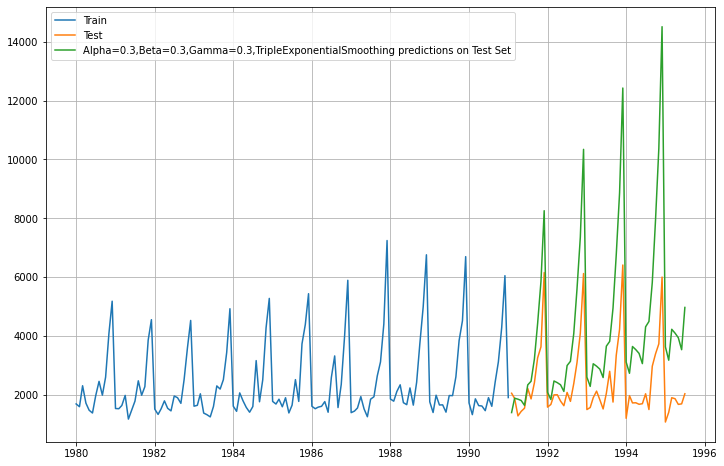

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['predict', 0.3,0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
finalmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.147,
                                                                 smoothing_slope=0.368,
                                                                 smoothing_seasonal=2.1192370620315578e-30,)

In [ ]:
RMSE_finalmodel1 = metrics.mean_squared_error(df['Sparkling'],finalmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_finalmodel1)

RMSE: 458.6833034880381


In [ ]:
prediction_1 = finalmodel1.forecast(steps=12)

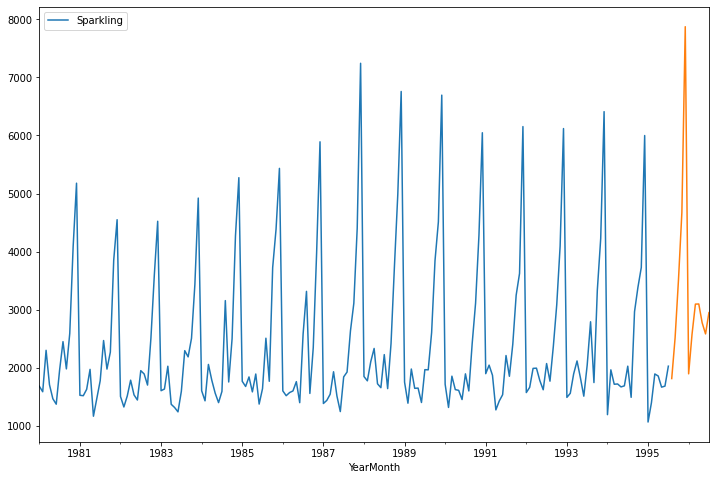

In [ ]:
df.plot()
prediction_1.plot();

In [ ]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(finalmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(finalmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,866.893931,1817.792912,2768.691892
1995-09-01,1569.494688,2520.393668,3471.292648
1995-10-01,2567.616602,3518.515582,4469.414563
1995-11-01,3723.858030,4674.757010,5625.655990
1995-12-01,6920.746529,7871.645510,8822.544490


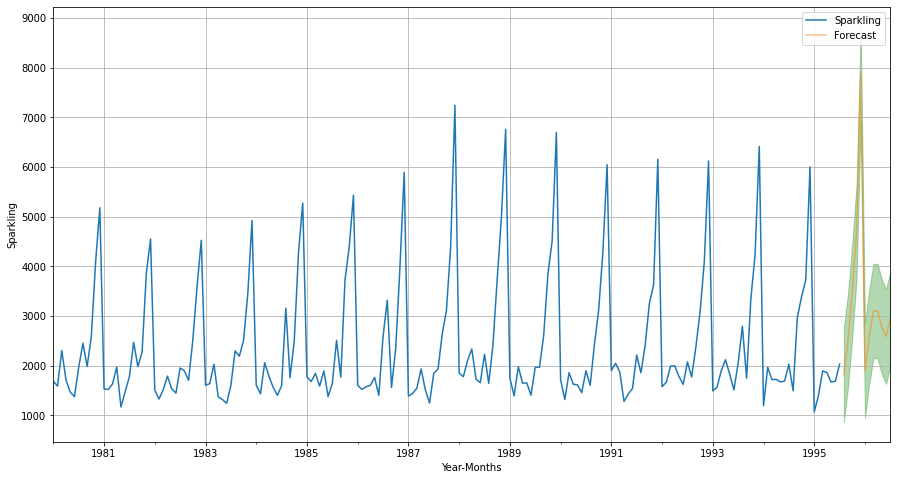

In [ ]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='green', alpha=.3)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:

#ACF And #PACF plot

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']= 12, 8

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

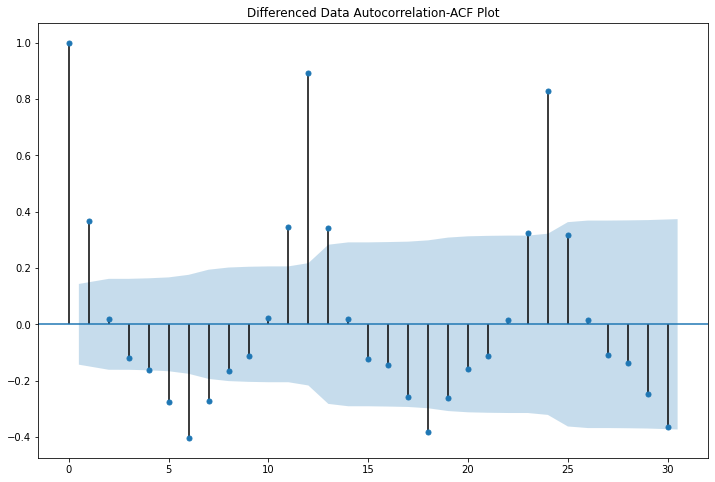

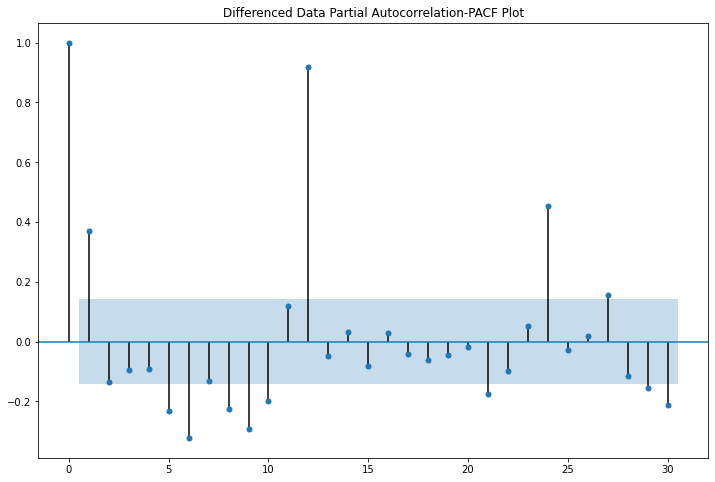

In [ ]:
plot_acf(df['Sparkling'].dropna(),lags=30,title='Differenced Data Autocorrelation-ACF Plot')
plot_pacf(df['Sparkling'].dropna(),lags=30,title='Differenced Data Partial Autocorrelation-PACF Plot')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(window=7).mean() 
    rolstd = timeseries.rolling(window=7).std()   

    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

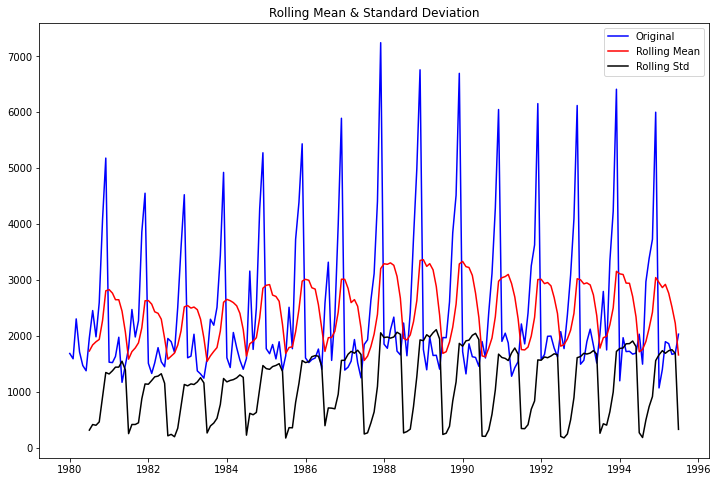

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df['Sparkling'])

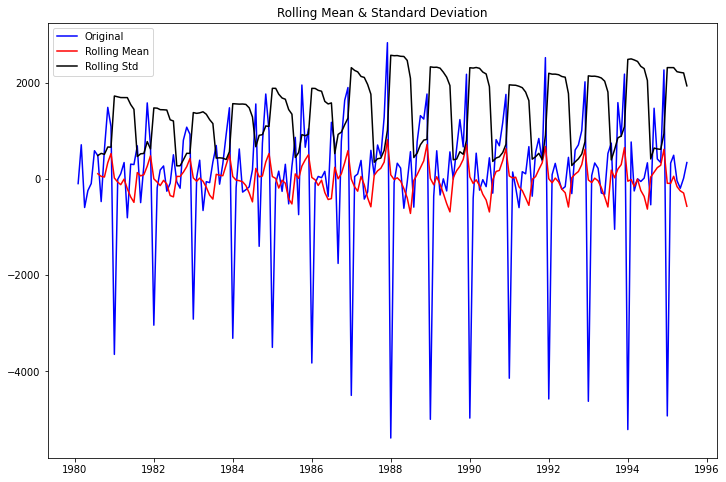

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df['Sparkling'].diff().dropna())

In [ ]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2294.7624515512757
ARIMA(0, 1, 1) - AIC:2286.847349343616
ARIMA(0, 1, 2) - AIC:2251.8357947443674
ARIMA(0, 1, 3) - AIC:2252.9371856390208
ARIMA(1, 1, 0) - AIC:2292.7129330308276
ARIMA(1, 1, 1) - AIC:2254.6195299291394
ARIMA(1, 1, 2) - AIC:2253.259412620982
ARIMA(1, 1, 3) - AIC:2244.269763283612
ARIMA(2, 1, 0) - AIC:2285.164151450794
ARIMA(2, 1, 1) - AIC:2251.846509924917
ARIMA(2, 1, 2) - AIC:2231.2144356275826
ARIMA(2, 1, 3) - AIC:2245.5001062275373
ARIMA(3, 1, 0) - AIC:2281.7792902725687
ARIMA(3, 1, 1) - AIC:2253.3397718554634
ARIMA(3, 1, 2) - AIC:2247.893624444023
ARIMA(3, 1, 3) - AIC:2244.6761150670563


In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2231.214436
7,"(1, 1, 3)",2244.269763
15,"(3, 1, 3)",2244.676115
11,"(2, 1, 3)",2245.500106
14,"(3, 1, 2)",2247.893624
2,"(0, 1, 2)",2251.835795
9,"(2, 1, 1)",2251.846510
3,"(0, 1, 3)",2252.937186
6,"(1, 1, 2)",2253.259413
13,"(3, 1, 1)",2253.339772


In [ ]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1109.607
Method:                       css-mle   S.D. of innovations           1028.665
Date:                Sat, 16 Jul 2022   AIC                           2231.214
Time:                        18:54:50   BIC                           2248.511
Sample:                    02-01-1980   HQIC                          2238.243
                         - 01-01-1991                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.3918      0.550      9.801      0.000       4.314       6.470
ar.L1.D.Sparkling     1.2352      0.074     16.694      0.000       1.090       1.380
ar.L2.D.Sparkling    -0.

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1450.8160085871723


In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2) Best AIC'])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1450.816009


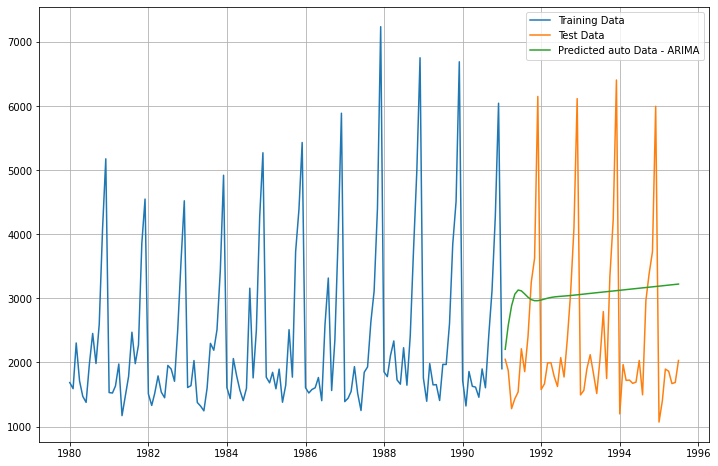

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted auto Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2276.40438968189
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1975.4583729011397
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1739.7947965617195
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1852.8662849692719
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1825.2072748165565
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1648.9809502933626
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1664.9749629752084
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1665.6962064070738
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1649.536328551906
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2251.8815378143836
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1939.341322298642
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1705.6142478106901
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1811.6066855780655
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1753.2872999384308
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1585.147611684035
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1620.5766242084096
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1614.3799107753575
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1585.4361320415485
SARIMA(0, 1, 2)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1571.213606
53,"(1, 1, 2)","(2, 0, 2, 12)",1571.626915
23,"(0, 1, 2)","(1, 0, 2, 12)",1572.211656
26,"(0, 1, 2)","(2, 0, 2, 12)",1572.449061
77,"(2, 1, 2)","(1, 0, 2, 12)",1573.036738


In [ ]:
import statsmodels.api as sm

auto_SARIMA_2 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_2 = auto_SARIMA_2.fit(maxiter=1000)
print(results_auto_SARIMA_2.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -778.607
Date:                            Sat, 16 Jul 2022   AIC                           1571.214
Time:                                    18:57:24   BIC                           1589.791
Sample:                                         0   HQIC                          1578.742
                                            - 133                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6298      0.264     -2.385      0.017      -1.147      -0.112
ma.L1         -0.1365      0.227   

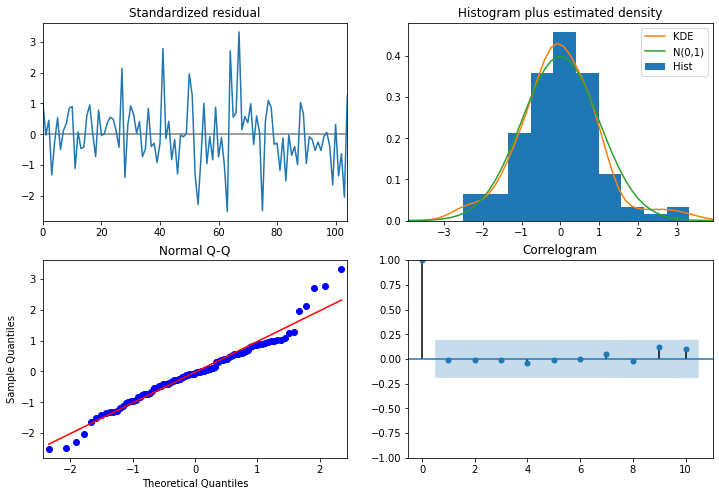

In [ ]:
results_auto_SARIMA_2.plot_diagnostics()
plt.show()

In [ ]:
predicted_auto_SARIMA_2 = results_auto_SARIMA_2.get_forecast(steps=len(test))
predicted_auto_SARIMA_2.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1500.660017,388.928322,738.374513,2262.945522
1,1688.797311,399.428802,905.931244,2471.663379
2,1739.139327,399.455476,956.220982,2522.057673
3,1488.112182,403.118036,698.015350,2278.209014
4,1351.389175,403.366015,560.806313,2141.972038


In [ ]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_2.predicted_mean,squared=False)
print(rmse)

455.75602022727713


In [ ]:
temp_resultsDf_auto_SARIMA= pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12) Best AIC'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_SARIMA])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1450.816009
"SARIMA(1,1,2)(1,0,2,12) Best AIC",455.756020


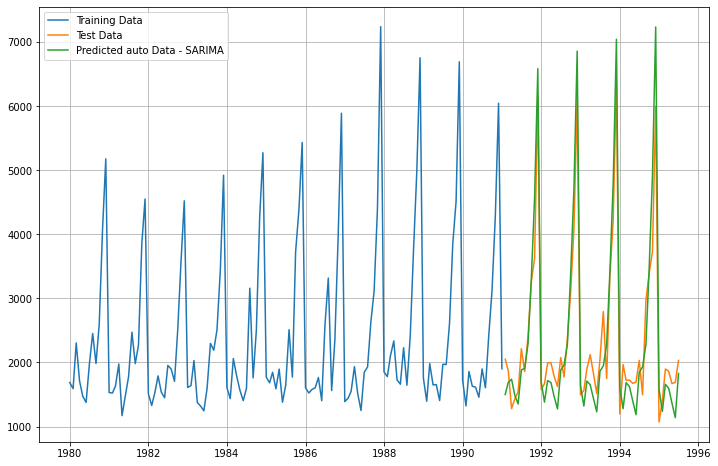

In [ ]:

plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_2.predicted_mean,label='Predicted auto Data - SARIMA')
plt.legend(loc='best')
plt.grid();

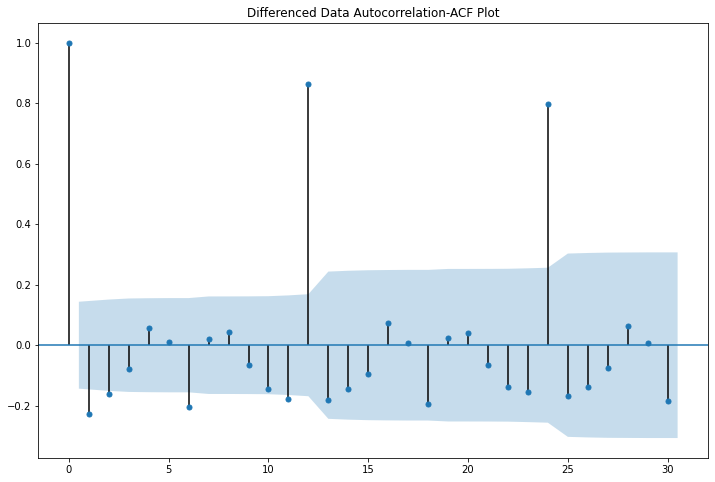

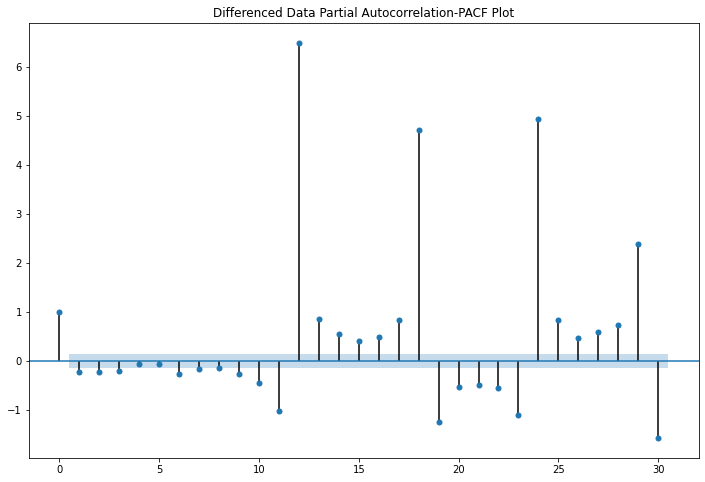

In [ ]:
plot_acf(df['Sparkling'].diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation-ACF Plot')
plot_pacf(df['Sparkling'].diff(1).dropna(),lags=30,title='Differenced Data Partial Autocorrelation-PACF Plot')
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
mn_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2))
results_mn_ARIMA = mn_ARIMA.fit()
print(results_mn_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1116.947
Method:                       css-mle   S.D. of innovations           1114.454
Date:                Sat, 16 Jul 2022   AIC                           2247.894
Time:                        18:57:46   BIC                           2268.073
Sample:                    02-01-1980   HQIC                          2256.094
                         - 01-01-1991                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0157      3.468      1.446      0.151      -1.782      11.813
ar.L1.D.Sparkling    -0.4693    3.9e-06   -1.2e+05      0.000      -0.469      -0.469
ar.L2.D.Sparkling     0.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
predicted_mn_ARIMA = results_mn_ARIMA.forecast(steps=len(test))

In [ ]:
rmse = mean_squared_error(test['Sparkling'],predicted_mn_ARIMA[0],squared=False)
print(rmse)

1341.272712394006


In [ ]:
temp_resultsDfARIMA1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2) at ACF & PACF plot'])


resultsDf = pd.concat([resultsDf,temp_resultsDfARIMA1])

resultsDf


,RMSE
"ARIMA(2,1,2) Best AIC",1450.816009
"SARIMA(1,1,2)(1,0,2,12) Best AIC",455.756020
"ARIMA(3,1,2) at ACF & PACF plot",1341.272712


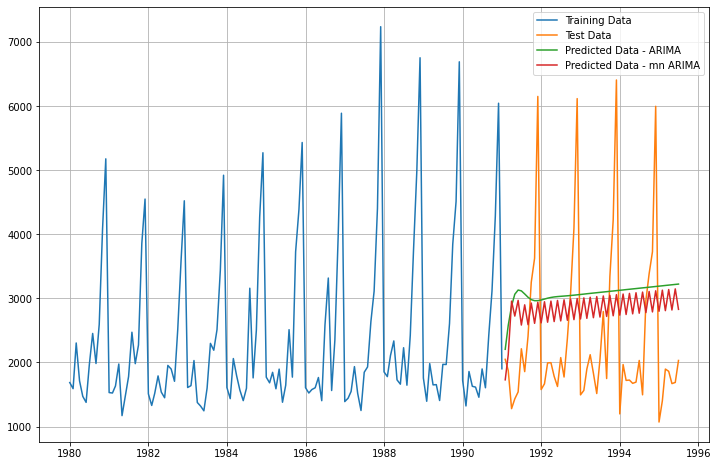

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,predicted_mn_ARIMA[0],label='Predicted Data - mn ARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
import statsmodels.api as sm

SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 0, 1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_12 = SARIMA_12.fit(maxiter=1000)
print(results_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  133
Model:             SARIMAX(3, 1, 2)x(1, 0, 1, 12)   Log Likelihood                -863.702
Date:                            Sat, 16 Jul 2022   AIC                           1743.404
Time:                                    18:58:00   BIC                           1765.501
Sample:                                         0   HQIC                          1752.375
                                            - 133                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.323     -1.996      0.046      -1.278      -0.012
ar.L2         -0.0614      0.158   

In [ ]:
temp_results_Sarima_2 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots '] )


resultsDf = pd.concat([resultsDf,temp_results_Sarima_2])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1450.816009
"SARIMA(1,1,2)(1,0,2,12) Best AIC",455.756020
"ARIMA(3,1,2) at ACF & PACF plot",1341.272712
"SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots",1341.272712
"SARIMA_Fulldata(1,1,2)(1,0,2,12)",539.981648
"SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots",539.981648


In [ ]:
predicted_mn_SARIMA = results_SARIMA_12.forecast(steps=len(test))

In [ ]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1,0,2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sat, 16 Jul 2022   AIC                           2360.827
Time:                                    18:58:22   BIC                           2382.309
Sample:                                01-01-1980   HQIC                          2369.551
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6610      0.242     -2.735      0.006      -1.135      -0.187
ma.L1         -0.2738      0.200   

In [ ]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1836.349283,379.700694,1092.149599,2580.548968
1995-09-01,2489.645806,384.466100,1736.106096,3243.185516
1995-10-01,3324.604711,384.572221,2570.857008,4078.352413
1995-11-01,4020.280434,386.330386,3263.086792,4777.474077
1995-12-01,6290.038563,386.384796,5532.738278,7047.338847


In [ ]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9816477630515


In [ ]:
temp_resultsDfSARIMA_Fulldata = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA_Fulldata(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDfSARIMA_Fulldata])

resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1450.816009
"SARIMA(1,1,2)(1,0,2,12) Best AIC",455.756020
"ARIMA(3,1,2) at ACF & PACF plot",1341.272712
"SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots",1341.272712
"SARIMA_Fulldata(1,1,2)(1,0,2,12)",539.981648


In [ ]:
pred_dynamic = results_full_data_model.get_prediction(start=pd.to_datetime('1980-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred95 = results_full_data_model.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()
forecast_fullmodel_autosarima = pred95.predicted_mean

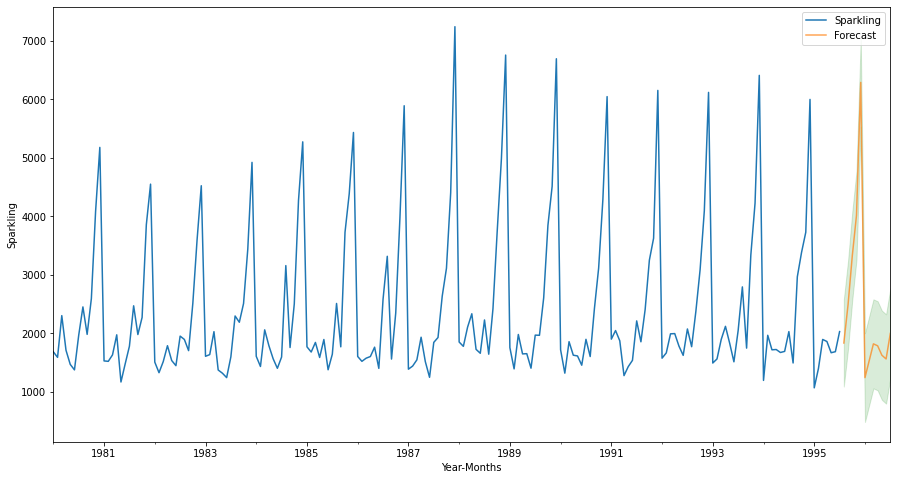

In [ ]:
axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='green', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [ ]:
resultsDf

,RMSE
"ARIMA(2,1,2) Best AIC",1450.816009
"SARIMA(1,1,2)(1,0,2,12) Best AIC",455.756020
"ARIMA(3,1,2) at ACF & PACF plot",1341.272712
"SARIMA (3,1,2)(1,0,1)12 Looking at ACF & PACF Plots",1341.272712
"SARIMA_Fulldata(1,1,2)(1,0,2,12)",539.981648


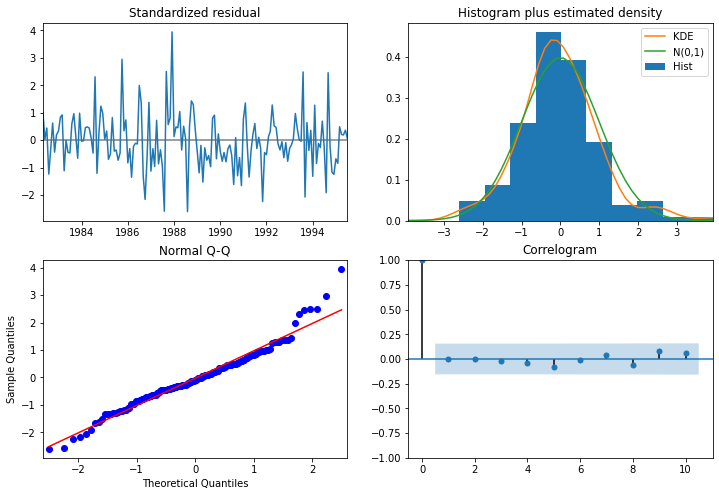

In [ ]:
results_full_data_model.plot_diagnostics();